<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - Neural Network <br>
<font color=696880 size=4>
    Javad Hezareh 
    
    
____


### Full Name : Sayeh Jarollahi
### Student Number : 98101339
___

# Problem
In this assignment our goal is to develop a framework for simple neural networks, multi layer perceptrons. We are going to use only `numpy` and no other packages to build our own classes and network.

# Setup

In [1]:
###################################
#  Do Not Add any other packages  #
###################################

import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import tqdm
import copy
from utils import *

plt.style.use('ggplot')

# Section 1: Modules implementation (65 Points)
We are going to implement required modules for a neural net. Each of this modules must implement the neccessery functions, `_forward` and `backward`. In the following parts, we will implement `LinearLayer`, `ReLU` and `SoftMax` layers.

## Layers

#### Linear Layer (10 Points)

In [2]:
class LinearLayer(Module):
    """
    A linear layer module which calculate (Wx + b).
    """

    def __init__(self, dim_in, dim_out, initializer, reg, alpha):
        """
        Args:
            - dim_in: input dimension,
            - dim_out: output dimension,
            - initializer: a function which get (dim_in, dim_out) and initialize
                a [dim_in x dim_out] matrix,
            - reg: L2-regularization flag
            - alpha: L2-regularization coefficient
        """
        self.dim_in = dim_in
        self.dim_out = dim_out
        self.params = {
            #########################################
            ##          Initialize parameters      ##
            ##              Your Code              ##
            #########################################
            'W': initializer(dim_in, dim_out),
            'b': initializer(1, dim_out)
        }
        self.grads = dict()
        self.cache = dict()
        self.reg = reg
        self.alpha = alpha

    def _forward(self, x):
        """
        linear forward function, calculate Wx+b for a batch of data

        Args:
            x : a batch of data

        Note:
            you need to store some values in cache to be able to
            calculate backward path.
        """
        #########################################
        ##              Your Code              ##
        #########################################
        y = x @ self.params['W'] + self.params['b']
        self.cache['x'] = x
        self.cache['W'] = self.params['W']
        self.cache['b'] = self.params['b']
        return y

    def backward(self, upstream):
        """
        get upstream gradient and returns downstream gradient

        Args:
            upstream : upstream gradient of loss w.r.t module output

        Note:
            you need to calculate gradient of loss w.r.t module input
            and parameters and store them in grads.
        """
        #########################################
        ##              Your Code              ##
        #########################################
        grad_b = np.sum(upstream, axis=0)
        grad_w = self.cache['x'].T @ upstream
        grad_x = upstream @ self.cache['W'].T
        grad_reg = 2 * self.alpha * self.cache['W'] if self.reg else 0

        self.grads = {
            'W': grad_w,
            'b': grad_b,
            'x': grad_x,
            'reg' : grad_reg
        }
        return grad_x



In [3]:
# sanity check, output must be from o(e-5)
initializer = lambda x, y: np.random.normal(size=(x, y))
linear = LinearLayer(5, 10, initializer, reg=True, alpha=1)
check_gradient_linear(linear, h=0.00001)

Gradient of loss w.r.t output:
[[0.82955535 0.21114721 0.29056745 0.76196253 0.48381119 0.26313752
  0.17058744 0.68924104 0.14521547 0.36108282]
 [0.17969557 0.61131998 0.90547691 0.09465278 0.04351438 0.82898441
  0.53347611 0.25746229 0.83709683 0.91589097]
 [0.95338569 0.53886974 0.68147718 0.14543317 0.36605854 0.25725115
  0.64065521 0.99467217 0.84735271 0.6116583 ]
 [0.6585274  0.09264464 0.55180917 0.84839143 0.74920247 0.66146217
  0.48228694 0.96546312 0.48159736 0.23890255]
 [0.62490249 0.71391215 0.39654666 0.08349731 0.25206548 0.14235356
  0.84943899 0.30579129 0.18025764 0.72632517]
 [0.07006783 0.77688796 0.90754448 0.97929669 0.15398316 0.39885902
  0.85437948 0.42579468 0.34963434 0.91473698]
 [0.92071169 0.33599422 0.31872931 0.63541889 0.58434891 0.17077758
  0.11395208 0.59733395 0.64102327 0.2976854 ]
 [0.36232214 0.94163488 0.10551311 0.04220206 0.55321597 0.03134844
  0.82945429 0.71557495 0.4421455  0.89943093]
 [0.15358404 0.01888662 0.93738637 0.70363497 0.2

#### ReLU Layer (5 Points)

In [4]:
class ReLU(Module):
    """
    Rectified Linear Unit function
    """

    def __init__(self):
        self.cache = dict()
        self.grads = dict()

    def _forward(self, x):
        """
        applies relu function on x

        Args:
            x : a batch of data

        Returns:
            y : relu of input
        """
        #########################################
        ##              Your Code              ##
        #########################################
        y = np.maximum(0, x)
        self.cache['x'] = x
        return y

    def backward(self, upstream):
        """
        calculate and store gradient of loss w.r.t module input

        Args:
            upstream : gradient of loss w.r.t modele output
        """
        #########################################
        ##              Your Code              ##
        #########################################
        grad_x=upstream
        grad_x[self.cache['x']<=0]=0
        self.grads['x'] = grad_x



In [5]:
# sanity check - output must be from o(e-8)
relu = ReLU()
check_gradient_relu(relu)

Gradient of loss w.r.t output:
[[0.         0.88325126 0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.93640053 0.         0.33644566]
 [0.87531923 0.36254974 0.         0.         0.96677731]
 [0.52121319 0.0189511  0.         0.67793154 0.20010495]
 [0.         0.46844046 0.26309046 0.         0.        ]
 [0.62944357 0.         0.         0.21539666 0.        ]
 [0.20357441 0.         0.75884962 0.         0.51406511]
 [0.         0.         0.72842911 0.         0.        ]
 [0.64932805 0.24568954 0.25430494 0.42654584 0.25253977]]
Gradient of loss w.r.t input:
[[0.         0.88325126 0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.93640053 0.         0.33644566]
 [0.87531923 0.36254974 0.         0.         0.96677731]
 [0.52121319 0.0189511  0.         0.67793154 0.20010495]
 [0.         0.46844046 0.26309046 0.         0.        ]
 [0.629443

#### SoftMax Layer (15 Points)

We could have a layer that calculate softmax for us. In other word, for input $x\in\mathcal{R}^N$ it would return $y\in\mathcal{R}^n$ where $y_i = \frac{e^{x_i}}{\sum e^{x_i}}$. But this method is not numerical stable because $e^{x_i}$ in this formulation can get very large easly and return `nan`. Instead of that we will implement a logarithmic version of softmax which instead of calculating $\frac{e^{x_i}}{\sum e^{x_i}}$, we will calculate $\log\left(\frac{e^{x_i}}{\sum e^{x_i}}\right) = x_i - \log\sum e^{x_i}$. In order to calculate second term you can use `np.logaddexp` but this function only works on two input. For more than two input, fill in the following function to be able to calculate log sum exp of an array of shape (b,n). `axis=1` means sum over columns and `axis=0` sum over rows.

In [6]:
def logsumexp(array, axis=1):
    """
    calculate log(sum(exp(array))) using np.logaddexp

    Args:
        array : input array
        axis : reduce axis, 1 means columns and 0 means rows
    """
    assert len(array) >= 2
    #########################################
    ##              Your Code              ##
    #########################################
    array = np.array(array, dtype = float)
    res = np.logaddexp.reduce(array, axis=axis)
    res = np.array([res])
    if axis ==1:
        res = res.T
    return res


In [7]:
class LogSoftMax(Module):
    def __init__(self):
        self.cache = dict()
        self.grads = dict()

    def _forward(self, x):
        """
        get x and calculate softmax of that.

        Args:
            x : batch of data with shape (b,m)

        Returns:
            y : log softmax of x with shape (b,m)
        """
        #########################################
        ##              Your Code              ##
        #########################################
        y = x - logsumexp(x)
        self.cache['x'] = x
        self.cache['y'] = y
        return y

    def backward(self, upstream):
        """
        calculate gradient of loss w.r.t module input and save that in grads.

        Args:
            upstream : gradient of loss w.r.t module output with sahpe (b,m)
        """
        #########################################
        ##              Your Code              ##
        #########################################
        grad_x = upstream - np.exp(self.cache['y']) * np.sum(upstream, axis=1).reshape(upstream.shape[0], 1)
        
        self.grads['x'] = grad_x



In [8]:
# sanity check, output must be from o(e-7)
sm = LogSoftMax()
check_gradient_softmax(sm)

Gradient of loss w.r.t output:
[[0.1630331  0.13488387 0.64710355 0.267412   0.38909318]
 [0.17558247 0.28087961 0.28324271 0.94903849 0.49365313]
 [0.66110396 0.48183119 0.81942941 0.72267524 0.05972474]
 [0.23687506 0.58419898 0.63517021 0.34454597 0.22345524]
 [0.88441083 0.96840966 0.22989379 0.11408372 0.45871137]
 [0.00832097 0.74025973 0.43923602 0.0739073  0.96269913]
 [0.17190485 0.1383921  0.6479173  0.88009471 0.35911365]
 [0.42453736 0.08015594 0.24649505 0.0371008  0.95956135]
 [0.14149331 0.25348514 0.93081829 0.36581357 0.52428419]
 [0.23683714 0.9252707  0.18926396 0.4527474  0.47814843]]
Gradient of loss w.r.t input:
[[-0.25543381 -0.14106689  0.41398    -0.12588516  0.10840584]
 [-0.20376161 -0.15868754 -0.08018071  0.43744502  0.00518484]
 [ 0.11956483  0.16874444  0.31243645 -0.01058303 -0.59016269]
 [-0.09121993  0.20407432  0.31101343  0.00085981 -0.42472763]
 [ 0.28037124  0.35101985 -0.11664377 -0.4851247  -0.02962261]
 [-0.29306479  0.21679663 -0.12605471 -0.46

## Model (10 Points)
We need a model class which gathers our layers togather and performs forward and backward on all of them.

In [9]:
class MLPModel(Module):
    """
    A multilayer neural network model
    """

    def __init__(self, layers):
        """
        Args:
            layers : list of model layers
        """
        self.layers = layers

    def _forward(self, x):
        """
        Perform forward on x

        Args:
            x : a batch of data

        Returns:
            o : model output
        """
        for layer in self.layers:
            o = layer._forward(x)
            x  = o 
        return o
        #########################################
        ##              Your Code              ##
        #########################################


    def backward(self, upstream):
        """
        Perform backward path on whole model

        Args:
            upstream : gradient of loss w.r.t model output
        """
        #########################################
        ##              Your Code              ##
        #########################################
        res = upstream
        for layer in reversed(self.layers):
            layer.backward(res)
            res = layer.grads['x']
        return np.copy(res)

    def get_parameters(self):
        """
        Returns:
            parametric_layers : all layers of model which have parameter
        """
        res = list()
        for layer in self.layers:
            if hasattr(layer, 'params'):
                res.append(layer)
        return res


## Loss functions (10 Points)
We need to implement loss functions to be able to train our network. We will implement CrossEntropy loss function. But notice that we have implemented `LogSoftMax` in logarithmic way so input of the following class will be logarithm of probabilities. 

In [10]:
class CrossEntropyLoss(Module):
    def __init__(self, mean=False):
        self.mean = mean
        self.cache = dict()
        self.grads = dict()

    def _forward(self, logprobs, targets):
        """
        Calculate cross entropy of inputs.

        Args:
            probs : matrix of probabilities with shape (b,n)
            targets : list of samples classes with shape (b,)

        Returns:
            y : cross entropy loss
        """
        #########################################
        ##              Your Code              ##
        #########################################
        y = None
        self.cache['x'] = logprobs
        tmp = np.zeros(logprobs.shape)
        for i in range(logprobs.shape[0]):
            tmp[i][targets[i]] = 1
        targets = tmp
        self.cache['target'] = targets

        y = - np.sum(targets*logprobs) / logprobs.shape[0]
        if self.mean:
            y = y / logprobs.shape[1]
        return y

    def backward(self, upstream):
        """
        Calculate gradient of loss w.r.t module input and save them in grads.

        Args:
            upstream : gradient of loss w.r.t module output (loss)
        """
        #########################################
        ##              Your Code              ##
        #########################################
        grad_scores = upstream * (-self.cache['target'] / self.cache['target'].shape[0])
        if self.mean:
            grad_scores /= self.cache['x'].shape[0]        
        self.grads['x'] = grad_scores



In [11]:
# check gradient, output must be from o(e-10)
ce = CrossEntropyLoss()
check_gradient_ce(ce, h=0.0001)

Gradient of loss w.r.t output:
1
Gradient of loss w.r.t input:
[[-0.  -0.1 -0.  -0.  -0. ]
 [-0.  -0.  -0.  -0.1 -0. ]
 [-0.  -0.  -0.  -0.  -0.1]
 [-0.1 -0.  -0.  -0.  -0. ]
 [-0.1 -0.  -0.  -0.  -0. ]
 [-0.  -0.1 -0.  -0.  -0. ]
 [-0.  -0.  -0.  -0.  -0.1]
 [-0.  -0.1 -0.  -0.  -0. ]
 [-0.  -0.1 -0.  -0.  -0. ]
 [-0.  -0.  -0.  -0.  -0.1]]
Relative error of delta-loss:
3.327145416815998e-13


## Optimization (15 Points)

Now that we have our network and loss function, we need to update model paremeters. We can do so by using `Optimizer` class that perform updating rule on model parameters. You need to implement `sgd` and `momentum` strategy for this optimizer. Becarefull to consider regularization update for linear units that require regularization.

In [12]:
class Optimizer():
    """
    Our main optimization class.
    
    You can add arguments to _sgd and _momentum function if you need to do so, and
    pass this arguments to step function when using optimizer. Don't change __init__
    or step function.
    """

    def __init__(self, layers, strategy, lr):
        """
        save layers here in order to update their parameters later.

        Args:
            layers : model layers (those that we want to update their parameters)
            strategy : optimization strategy
            lr : learning rate
        """
        self.layers = layers
        self.strategy = strategy
        self.lr = lr
        self.strategies = {
            'sgd': self._sgd,
            'momentum': self._momentum,
        }

    def step(self, *args):
        """
        Perform updating strategy on all layers paramters.
        """
        self.strategies[self.strategy](*args)

    def _sgd(self):
        """
        Perform sgd update on all parameters of layers
        """
        #########################################
        ##              Your Code              ##
        #########################################
        for layer in self.layers:
            for param, val in layer.params.items():
                diff = layer.grads[param] * self.lr
                if layer.reg and param == 'W':
                    diff += self.lr *  layer.grads['reg']
                layer.params[param] -= diff

    
    def _momentum(self, gamma = 0.15):
        """
        Perform momentum update on all parameters of layers
        """
        #########################################
        ##              Your Code              ##
        #########################################
        for layer in self.layers:
            for param, val in layer.params.items():
                v_t = layer.cache.get(f'v_{param}',0) * gamma
                v_t += self.lr * layer.grads[param]
                if param == 'W' and layer.reg:
                    v_t += self.lr * layer.grads['reg']
                layer.cache[f'v_{param}'] = v_t
                layer.params[param] -= v_t


# Section 2: CIFAR-10 Classification (35 Points)

Now that we can build a neural network we want to solve CIFAR-10 classification problem. This dataset consists of 60000 $32 \times 32$ coloured images in 10 classes.

## Data preparation (5 Points)

In [13]:
#################################################
##      Run this cell to download dataset      ##
##         the dataset is about 150 MB         ##
#################################################
! chmod 777 cifar10_downloader.bash
! ./cifar10_downloader.bash

In [14]:
#############################################
##      Run this cell to load dataset      ##
#############################################
data = load_dataset(train_num=4000, test_num=1000)

for k in data.keys():
    print(f'{k}: {data[k].shape}')

X_train: (4000, 32, 32, 3)
Y_train: (4000,)
X_test: (1000, 32, 32, 3)
Y_test: (1000,)


In [15]:
##############################################
##      Split train set to train/val        ##
################[Your Code]###################
def split_data(X, y, train_pr=0.8):
    index = np.array(range(y.shape[0]))
    np.random.shuffle(index)
    train_index = index[:int(train_pr * len(index))]
    test_index = index[int(train_pr * len(index)):]
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]
    return X_train, y_train, X_test, y_test

data['X_train'], data['Y_train'], data['X_validation'], data['Y_validation'] = split_data(data['X_train'], data['Y_train'], 0.85)
##############################################
for k in data.keys():
    print(f'{k}: {data[k].shape}')

X_train: (3400, 32, 32, 3)
Y_train: (3400,)
X_test: (1000, 32, 32, 3)
Y_test: (1000,)
X_validation: (600, 32, 32, 3)
Y_validation: (600,)


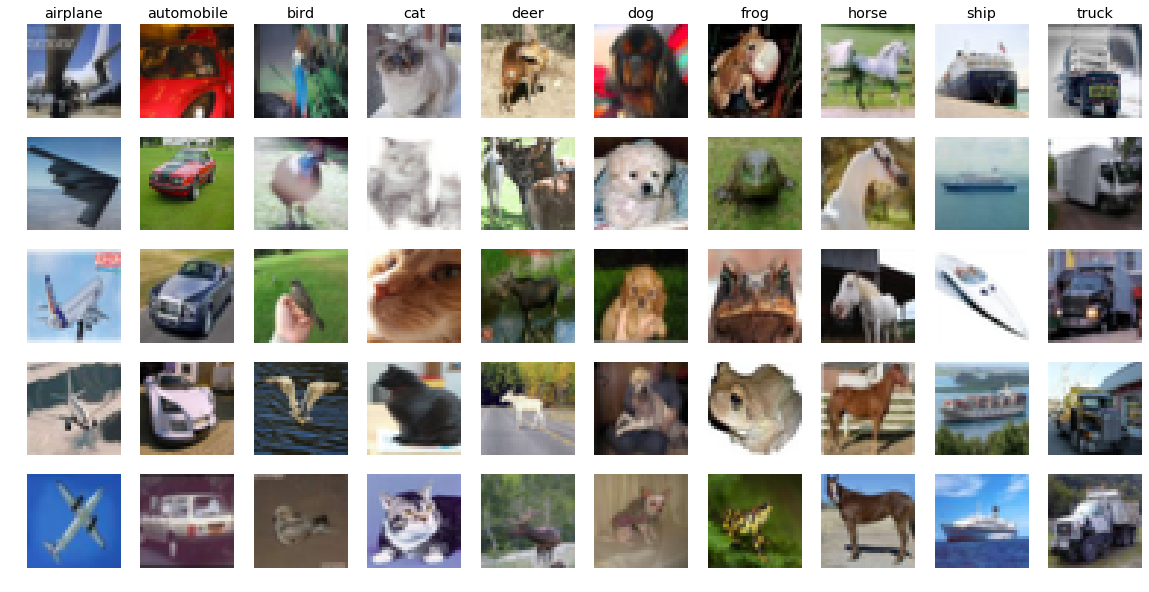

In [16]:
##################################################
##      Visualize 5 samples from each class     ##
##################[Your Code]#####################
NUM_CLASSES = 10
CLASSES = {0:'airplane',1: 'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}
SAMPLE_COUNT = 5
import cv2
def visualize(X, y):
    fig = plt.figure(figsize=(20, 10))
    all_indexes = np.arange(0, y.shape[0])
    image_count = 1
    for id, lbl in CLASSES.items():
        indexes = all_indexes[y==id]
        choices = np.random.choice(indexes, size=SAMPLE_COUNT, replace=False)
        row = 0 
        for choice in choices:
            fig.add_subplot(5, 10, 10*row + id +1)
            row += 1
            image_count += 1
            image = X[choice]
            plt.imshow(image)
            plt.axis('off')
            if row == 1:
                plt.title(lbl)

visualize(data['X_train'], data['Y_train'])

In [17]:
#####################################################
##             Normalize and flatten X             ##
####################[Your Code]######################
def normalize(x):
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    return (x-mean) / std

def flatten(x):
    return x.reshape(x.shape[0], -1)

data['X_train'] = normalize(flatten(data['X_train']))
data['X_test'] = normalize(flatten(data['X_test']))
data['X_validation'] = normalize(flatten(data['X_validation']))


#####################################################
for k in data.keys():
    print(f'{k}: {data[k].shape}')

X_train: (3400, 3072)
Y_train: (3400,)
X_test: (1000, 3072)
Y_test: (1000,)
X_validation: (600, 3072)
Y_validation: (600,)


## Train and Test Model (25 Points)

### Batch Sampler
We need to sample bathces from our dataset to train model. Complete the following class to have a random sampler.

In [18]:
class RandomSampler(object):
    def __init__(self, batch_size, dataset, type):
        """
        Args:
            batch_size : sampler batch size
            dataset : dataset we want to get batch from that
            type : one of {'train', 'test', 'val'}
        """
        self.batch_size = batch_size
        self.dataset = dataset
        self.x_key = f'X_{type}'
        self.y_key = f'Y_{type}'
        self.num_batches = int(np.ceil(data[self.y_key].shape[0] / batch_size))
        self.indices = np.array_split(range(data[self.y_key].shape[0]), self.num_batches)
        
        ################################################################
        ##       Build batches indices and store them in indices      ##
        ##          Also store number of batches in num_batches       ##
        ##                          Your Code                         ##
        ################################################################
        

    def __len__(self):
        assert type(self.num_batches) == int
        return self.num_batches

    def __iter__(self):
        """
        This function call when we iterate an object of this class and
        yields one batch on each call.

        Yields:
            (x, y) : tuple of bathces of x and y
        """
        for idx in self.indices:
            x = self.dataset[self.x_key][idx]
            y = self.dataset[self.y_key][idx]
            yield x, y


Fill the following functions to update a confusion matrix and calculate f1 score for a confusion matrix. For multi class f1 score read [here](https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1).

In [19]:
def update_confusion_matrix(conf_matrix, preds, reals):
    """
    Updates confusion matrix

    Args:
        conf_matrix : input confusion matrix
        preds : array of predicted labels
        reals : array of real labels

    Returns:
        conf_matrix : updated confusion matrix
    """
    #################################
    ##          Your Code          ##
    #################################
    for i, j in zip(preds, reals):
        conf_matrix[i][j] += 1
    return conf_matrix


def f1_score(confusion_matrix):
    """
    calculate macro f1 score from given confusion matrix

    Args:
        confusion_matrix : given confusion matrix
        
    Returns:
        f1 : macro f1 score
    """
    #################################
    ##          Your Code          ##
    #################################
    confusion_matrix = np.array(confusion_matrix)
    f1_score = 2 * confusion_matrix.diagonal() / (np.sum(confusion_matrix, axis=0) + np.sum(confusion_matrix, axis=1))
    f1_score = np.mean(f1_score)
    
    return f1_score

### Define Model
Define an MLP model to solve classification problem.

In [59]:
#########################################
##          Hyper parameters           ##
#########################################

n_epochs = 50
batch_size = 64
lr = 1e-3
reg_coeff = 0.1

In [65]:
###############################################
##             Define your model             ##
##     use a good initializer for layers     ##
###############################################
initializer = lambda x, y: np.random.normal(scale=np.sqrt(2 / x), size=(x, y))
layer_sizes = [3072,1024, 256, 128, 64, 32, 10]
layers  = []
for i in range(len(layer_sizes )-1):
    lin = LinearLayer(layer_sizes[i], layer_sizes[i+1], initializer, True, reg_coeff)
    layers.append(lin)
    if i%2==0:
        layers.append(ReLU())
layers.append(LogSoftMax())
model = MLPModel(layers)

In [66]:
##################################################
##      Define optimizer, loss and sampler      ##
##################################################

optimizer = Optimizer(model.get_parameters(), 'sgd', lr)
criterion = CrossEntropyLoss()
train_sampler = RandomSampler(batch_size, data, 'train')
val_sampler = RandomSampler(batch_size, data, 'validation')
test_sampler = RandomSampler(batch_size, data, 'test')

### Train Model

Fill in the below cell to train the model. Store each epoch loss, accuracy and f1-score. Use f1-score to choose best epoch.

**Note1**: To do backpropagation you need to first call `backward` function of criterion with 1 as its argument to have gradient of loss w.r.t output of this module and then using model `backward` function with `criterion.grads['x']` argument.

**Note2**: You can ignore regularization term in your total loss value and just use criterion, but you must consider that during updating.

In [67]:
#########################################
##      Train and Validation loop      ##
#########################################
train_losses, val_losses = [], []
train_accs, val_accs = [], []
train_f1, val_f1 = [], []
best_model = None
best_f1 = 0

for epoch in range(n_epochs):
    
    # Train Phase
    total_loss = 0
    N = 0
    confusion = np.zeros((10, 10))
    with tqdm.tqdm(enumerate(train_sampler), total=len(train_sampler)) as pbar:
        for i, (x, y) in pbar:
            #################################
            ##          Your Code          ##
            #################################
            y_pred = model._forward(x)
            y_argmax_pred = np.argmax(y_pred, axis=1)
            confusion = update_confusion_matrix(confusion, y_argmax_pred, y)
            loss = np.sum(criterion._forward(y_pred, y))
            total_loss += loss
            criterion.backward(1)
            model.backward(criterion.grads['x'])
            optimizer.step()
            N += y.shape[0]


            acc = np.sum(y_argmax_pred==y) / y.shape[0]
            f1 = f1_score(confusion)
            pbar.set_description(f'Train {epoch} | Loss:{total_loss/N:.2e} | Acc: {acc:.2f}| F1: {f1:.2f}|')
    
    # save epoch metrics for train phase
    train_losses.append(total_loss/N)
    train_accs.append(acc)
    train_f1.append(f1)
    

    # Validation Phase
    total_loss = 0
    N = 0
    confusion = np.zeros((10, 10))
    with tqdm.tqdm(enumerate(val_sampler), total=len(val_sampler)) as pbar:
        for i, (x, y) in pbar:
            #################################
            ##          Your Code          ##
            #################################
            y_pred = model._forward(x)
            y_argmax_pred = np.argmax(y_pred, axis=1)
            confusion = update_confusion_matrix(confusion, y_argmax_pred, y)
            loss = np.sum(criterion._forward(y_pred, y))
            total_loss += loss
            N += y.shape[0]

            acc = np.sum(y_argmax_pred==y) / y.shape[0]
            f1 = f1_score(confusion)
            pbar.set_description(f'Val   {epoch} | Loss:{total_loss/N:.2e} | Acc: {acc:.2f}| F1: {f1:.2f}|')
    
    # save epoch metrics for validation phase
    val_losses.append(total_loss/N)
    val_accs.append(acc)
    val_f1.append(f1)
    
    
    #################################
    ##       update best model     ##
    ##          Your Code          ##
    #################################
    if f1 > best_f1:
        print(f'changing best model in epoch {epoch}')
        best_model = copy.deepcopy(model)
        best_f1 = f1
    
    
    print(f'----------------------------[Epoch{epoch+1} finished!]----------------------------')

Train 0 | Loss:4.67e-02 | Acc: 0.15| F1: 0.15|: 100%|██████████| 54/54 [00:02<00:00, 16.45it/s]
Val   0 | Loss:3.90e-02 | Acc: 0.30| F1: 0.18|: 100%|██████████| 10/10 [00:00<00:00, 99.35it/s]
Train 1 | Loss:3.49e-02 | Acc: 0.25| F1: 0.23|:   4%|▎         | 2/54 [00:00<00:03, 15.72it/s]

changing best model in epoch 0
----------------------------[Epoch1 finished!]----------------------------


Train 1 | Loss:3.46e-02 | Acc: 0.21| F1: 0.23|: 100%|██████████| 54/54 [00:03<00:00, 16.49it/s]
Val   1 | Loss:3.67e-02 | Acc: 0.33| F1: 0.21|: 100%|██████████| 10/10 [00:00<00:00, 96.96it/s]
Train 2 | Loss:3.29e-02 | Acc: 0.24| F1: 0.25|:   4%|▎         | 2/54 [00:00<00:03, 16.25it/s]

changing best model in epoch 1
----------------------------[Epoch2 finished!]----------------------------


Train 2 | Loss:3.23e-02 | Acc: 0.21| F1: 0.26|: 100%|██████████| 54/54 [00:02<00:00, 20.81it/s]
Val   2 | Loss:3.55e-02 | Acc: 0.33| F1: 0.23|: 100%|██████████| 10/10 [00:00<00:00, 106.44it/s]
Train 3 | Loss:3.00e-02 | Acc: 0.29| F1: 0.34|:   4%|▎         | 2/54 [00:00<00:03, 15.28it/s]

changing best model in epoch 2
----------------------------[Epoch3 finished!]----------------------------


Train 3 | Loss:3.08e-02 | Acc: 0.23| F1: 0.29|: 100%|██████████| 54/54 [00:03<00:00, 18.61it/s]
Val   3 | Loss:3.45e-02 | Acc: 0.33| F1: 0.23|: 100%|██████████| 10/10 [00:00<00:00, 73.47it/s]
Train 4 | Loss:2.87e-02 | Acc: 0.33| F1: 0.38|:   4%|▎         | 2/54 [00:00<00:04, 12.87it/s]

----------------------------[Epoch4 finished!]----------------------------


Train 4 | Loss:2.97e-02 | Acc: 0.24| F1: 0.32|: 100%|██████████| 54/54 [00:03<00:00, 16.56it/s]
Val   4 | Loss:3.39e-02 | Acc: 0.33| F1: 0.25|: 100%|██████████| 10/10 [00:00<00:00, 49.37it/s]
Train 5 | Loss:2.90e-02 | Acc: 0.30| F1: 0.35|:   4%|▎         | 2/54 [00:00<00:02, 17.91it/s]

changing best model in epoch 4
----------------------------[Epoch5 finished!]----------------------------


Train 5 | Loss:2.89e-02 | Acc: 0.29| F1: 0.34|: 100%|██████████| 54/54 [00:02<00:00, 21.26it/s]
Val   5 | Loss:3.34e-02 | Acc: 0.33| F1: 0.27|: 100%|██████████| 10/10 [00:00<00:00, 148.63it/s]
Train 6 | Loss:2.84e-02 | Acc: 0.32| F1: 0.38|:   4%|▎         | 2/54 [00:00<00:02, 18.84it/s]

changing best model in epoch 5
----------------------------[Epoch6 finished!]----------------------------


Train 6 | Loss:2.83e-02 | Acc: 0.29| F1: 0.35|: 100%|██████████| 54/54 [00:02<00:00, 23.28it/s]
Val   6 | Loss:3.30e-02 | Acc: 0.35| F1: 0.27|: 100%|██████████| 10/10 [00:00<00:00, 107.08it/s]
Train 7 | Loss:2.67e-02 | Acc: 0.40| F1: 0.42|:   4%|▎         | 2/54 [00:00<00:03, 14.72it/s]

changing best model in epoch 6
----------------------------[Epoch7 finished!]----------------------------


Train 7 | Loss:2.78e-02 | Acc: 0.26| F1: 0.37|: 100%|██████████| 54/54 [00:02<00:00, 19.58it/s]
Val   7 | Loss:3.27e-02 | Acc: 0.35| F1: 0.27|: 100%|██████████| 10/10 [00:00<00:00, 122.05it/s]
Train 8 | Loss:2.75e-02 | Acc: 0.32| F1: 0.38|:   6%|▌         | 3/54 [00:00<00:02, 21.84it/s]

changing best model in epoch 7
----------------------------[Epoch8 finished!]----------------------------


Train 8 | Loss:2.74e-02 | Acc: 0.29| F1: 0.38|: 100%|██████████| 54/54 [00:03<00:00, 15.61it/s]
Val   8 | Loss:3.24e-02 | Acc: 0.38| F1: 0.28|: 100%|██████████| 10/10 [00:00<00:00, 105.83it/s]
Train 9 | Loss:2.71e-02 | Acc: 0.32| F1: 0.41|:   4%|▎         | 2/54 [00:00<00:02, 19.25it/s]

changing best model in epoch 8
----------------------------[Epoch9 finished!]----------------------------


Train 9 | Loss:2.71e-02 | Acc: 0.31| F1: 0.39|: 100%|██████████| 54/54 [00:02<00:00, 19.86it/s]
Val   9 | Loss:3.21e-02 | Acc: 0.42| F1: 0.29|: 100%|██████████| 10/10 [00:00<00:00, 117.70it/s]
Train 10 | Loss:2.51e-02 | Acc: 0.56| F1: 0.52|:   2%|▏         | 1/54 [00:00<00:05,  9.74it/s]

changing best model in epoch 9
----------------------------[Epoch10 finished!]----------------------------


Train 10 | Loss:2.68e-02 | Acc: 0.29| F1: 0.40|: 100%|██████████| 54/54 [00:02<00:00, 20.76it/s]
Val   10 | Loss:3.18e-02 | Acc: 0.42| F1: 0.30|: 100%|██████████| 10/10 [00:00<00:00, 128.78it/s]
Train 11 | Loss:2.55e-02 | Acc: 0.44| F1: 0.46|:   4%|▎         | 2/54 [00:00<00:04, 11.93it/s]

changing best model in epoch 10
----------------------------[Epoch11 finished!]----------------------------


Train 11 | Loss:2.66e-02 | Acc: 0.29| F1: 0.41|: 100%|██████████| 54/54 [00:02<00:00, 18.93it/s]
Val   11 | Loss:3.16e-02 | Acc: 0.42| F1: 0.29|: 100%|██████████| 10/10 [00:00<00:00, 77.85it/s]
Train 12 | Loss:2.63e-02 | Acc: 0.35| F1: 0.43|:   4%|▎         | 2/54 [00:00<00:02, 17.66it/s]

----------------------------[Epoch12 finished!]----------------------------


Train 12 | Loss:2.63e-02 | Acc: 0.32| F1: 0.42|: 100%|██████████| 54/54 [00:02<00:00, 20.73it/s]
Val   12 | Loss:3.14e-02 | Acc: 0.43| F1: 0.30|: 100%|██████████| 10/10 [00:00<00:00, 186.50it/s]
Train 13 | Loss:2.61e-02 | Acc: 0.46| F1: 0.44|:   6%|▌         | 3/54 [00:00<00:02, 22.32it/s]

changing best model in epoch 12
----------------------------[Epoch13 finished!]----------------------------


Train 13 | Loss:2.62e-02 | Acc: 0.34| F1: 0.42|: 100%|██████████| 54/54 [00:02<00:00, 22.81it/s]
Val   13 | Loss:3.12e-02 | Acc: 0.45| F1: 0.31|: 100%|██████████| 10/10 [00:00<00:00, 119.09it/s]
Train 14 | Loss:2.59e-02 | Acc: 0.46| F1: 0.44|:   6%|▌         | 3/54 [00:00<00:02, 23.02it/s]

changing best model in epoch 13
----------------------------[Epoch14 finished!]----------------------------


Train 14 | Loss:2.61e-02 | Acc: 0.31| F1: 0.43|: 100%|██████████| 54/54 [00:02<00:00, 23.09it/s]
Val   14 | Loss:3.11e-02 | Acc: 0.45| F1: 0.32|: 100%|██████████| 10/10 [00:00<00:00, 112.08it/s]
Train 15 | Loss:2.58e-02 | Acc: 0.35| F1: 0.44|:   4%|▎         | 2/54 [00:00<00:02, 18.87it/s]

changing best model in epoch 14
----------------------------[Epoch15 finished!]----------------------------


Train 15 | Loss:2.60e-02 | Acc: 0.31| F1: 0.43|: 100%|██████████| 54/54 [00:02<00:00, 24.58it/s]
Val   15 | Loss:3.10e-02 | Acc: 0.48| F1: 0.33|: 100%|██████████| 10/10 [00:00<00:00, 80.58it/s]
Train 16 | Loss:2.57e-02 | Acc: 0.37| F1: 0.45|:   6%|▌         | 3/54 [00:00<00:02, 22.41it/s]

changing best model in epoch 15
----------------------------[Epoch16 finished!]----------------------------


Train 16 | Loss:2.59e-02 | Acc: 0.37| F1: 0.44|: 100%|██████████| 54/54 [00:02<00:00, 18.64it/s]
Val   16 | Loss:3.08e-02 | Acc: 0.48| F1: 0.33|: 100%|██████████| 10/10 [00:00<00:00, 64.38it/s]
Train 17 | Loss:2.56e-02 | Acc: 0.48| F1: 0.44|:   6%|▌         | 3/54 [00:00<00:02, 22.41it/s]

changing best model in epoch 16
----------------------------[Epoch17 finished!]----------------------------


Train 17 | Loss:2.58e-02 | Acc: 0.39| F1: 0.44|: 100%|██████████| 54/54 [00:03<00:00, 15.68it/s]
Val   17 | Loss:3.07e-02 | Acc: 0.48| F1: 0.34|: 100%|██████████| 10/10 [00:00<00:00, 55.00it/s]
Train 18 | Loss:2.48e-02 | Acc: 0.46| F1: 0.49|:   4%|▎         | 2/54 [00:00<00:03, 14.53it/s]

changing best model in epoch 17
----------------------------[Epoch18 finished!]----------------------------


Train 18 | Loss:2.58e-02 | Acc: 0.39| F1: 0.45|: 100%|██████████| 54/54 [00:02<00:00, 19.91it/s]
Val   18 | Loss:3.07e-02 | Acc: 0.47| F1: 0.34|: 100%|██████████| 10/10 [00:00<00:00, 116.59it/s]
Train 19 | Loss:2.58e-02 | Acc: 0.41| F1: 0.44|:   6%|▌         | 3/54 [00:00<00:01, 26.14it/s]

----------------------------[Epoch19 finished!]----------------------------


Train 19 | Loss:2.58e-02 | Acc: 0.40| F1: 0.45|: 100%|██████████| 54/54 [00:02<00:00, 19.98it/s]
Val   19 | Loss:3.06e-02 | Acc: 0.45| F1: 0.34|: 100%|██████████| 10/10 [00:00<00:00, 141.68it/s]
Train 20 | Loss:2.55e-02 | Acc: 0.35| F1: 0.44|:   6%|▌         | 3/54 [00:00<00:02, 20.94it/s]

changing best model in epoch 19
----------------------------[Epoch20 finished!]----------------------------


Train 20 | Loss:2.58e-02 | Acc: 0.39| F1: 0.45|: 100%|██████████| 54/54 [00:02<00:00, 20.64it/s]
Val   20 | Loss:3.06e-02 | Acc: 0.42| F1: 0.33|: 100%|██████████| 10/10 [00:00<00:00, 135.97it/s]
Train 21 | Loss:2.58e-02 | Acc: 0.44| F1: 0.43|:   6%|▌         | 3/54 [00:00<00:01, 28.06it/s]

----------------------------[Epoch21 finished!]----------------------------


Train 21 | Loss:2.58e-02 | Acc: 0.37| F1: 0.45|: 100%|██████████| 54/54 [00:02<00:00, 19.77it/s]
Val   21 | Loss:3.05e-02 | Acc: 0.43| F1: 0.34|: 100%|██████████| 10/10 [00:00<00:00, 51.23it/s]
Train 22 | Loss:2.49e-02 | Acc: 0.49| F1: 0.50|:   4%|▎         | 2/54 [00:00<00:02, 18.83it/s]

----------------------------[Epoch22 finished!]----------------------------


Train 22 | Loss:2.58e-02 | Acc: 0.37| F1: 0.45|: 100%|██████████| 54/54 [00:03<00:00, 16.82it/s]
Val   22 | Loss:3.05e-02 | Acc: 0.43| F1: 0.34|: 100%|██████████| 10/10 [00:00<00:00, 38.69it/s]
Train 23 | Loss:2.56e-02 | Acc: 0.38| F1: 0.43|:   6%|▌         | 3/54 [00:00<00:02, 21.89it/s]

----------------------------[Epoch23 finished!]----------------------------


Train 23 | Loss:2.58e-02 | Acc: 0.37| F1: 0.46|: 100%|██████████| 54/54 [00:02<00:00, 21.05it/s]
Val   23 | Loss:3.04e-02 | Acc: 0.43| F1: 0.33|: 100%|██████████| 10/10 [00:00<00:00, 137.18it/s]
Train 24 | Loss:2.56e-02 | Acc: 0.38| F1: 0.44|:   4%|▎         | 2/54 [00:00<00:03, 14.73it/s]

----------------------------[Epoch24 finished!]----------------------------


Train 24 | Loss:2.59e-02 | Acc: 0.40| F1: 0.45|: 100%|██████████| 54/54 [00:02<00:00, 19.26it/s]
Val   24 | Loss:3.04e-02 | Acc: 0.43| F1: 0.34|: 100%|██████████| 10/10 [00:00<00:00, 88.57it/s]
Train 25 | Loss:2.51e-02 | Acc: 0.49| F1: 0.50|:   4%|▎         | 2/54 [00:00<00:02, 17.60it/s]

----------------------------[Epoch25 finished!]----------------------------


Train 25 | Loss:2.59e-02 | Acc: 0.39| F1: 0.46|: 100%|██████████| 54/54 [00:02<00:00, 20.71it/s]
Val   25 | Loss:3.04e-02 | Acc: 0.45| F1: 0.33|: 100%|██████████| 10/10 [00:00<00:00, 85.97it/s]
Train 26 | Loss:2.58e-02 | Acc: 0.38| F1: 0.43|:   6%|▌         | 3/54 [00:00<00:02, 23.23it/s]

----------------------------[Epoch26 finished!]----------------------------


Train 26 | Loss:2.60e-02 | Acc: 0.40| F1: 0.45|: 100%|██████████| 54/54 [00:02<00:00, 19.54it/s]
Val   26 | Loss:3.04e-02 | Acc: 0.45| F1: 0.34|: 100%|██████████| 10/10 [00:00<00:00, 135.15it/s]
Train 27 | Loss:2.61e-02 | Acc: 0.41| F1: 0.43|:   6%|▌         | 3/54 [00:00<00:01, 26.58it/s]

----------------------------[Epoch27 finished!]----------------------------


Train 27 | Loss:2.60e-02 | Acc: 0.40| F1: 0.45|: 100%|██████████| 54/54 [00:02<00:00, 19.69it/s]
Val   27 | Loss:3.04e-02 | Acc: 0.45| F1: 0.34|: 100%|██████████| 10/10 [00:00<00:00, 119.77it/s]
Train 28 | Loss:2.53e-02 | Acc: 0.49| F1: 0.48|:   2%|▏         | 1/54 [00:00<00:05,  9.64it/s]

changing best model in epoch 27
----------------------------[Epoch28 finished!]----------------------------


Train 28 | Loss:2.61e-02 | Acc: 0.40| F1: 0.45|: 100%|██████████| 54/54 [00:02<00:00, 22.09it/s]
Val   28 | Loss:3.05e-02 | Acc: 0.47| F1: 0.34|: 100%|██████████| 10/10 [00:00<00:00, 134.85it/s]
Train 29 | Loss:2.59e-02 | Acc: 0.40| F1: 0.45|:   6%|▌         | 3/54 [00:00<00:02, 20.97it/s]

----------------------------[Epoch29 finished!]----------------------------


Train 29 | Loss:2.62e-02 | Acc: 0.39| F1: 0.45|: 100%|██████████| 54/54 [00:02<00:00, 21.04it/s]
Val   29 | Loss:3.05e-02 | Acc: 0.45| F1: 0.34|: 100%|██████████| 10/10 [00:00<00:00, 58.72it/s]
Train 30 | Loss:2.55e-02 | Acc: 0.51| F1: 0.49|:   4%|▎         | 2/54 [00:00<00:04, 11.45it/s]

----------------------------[Epoch30 finished!]----------------------------


Train 30 | Loss:2.63e-02 | Acc: 0.40| F1: 0.45|: 100%|██████████| 54/54 [00:03<00:00, 15.33it/s]
Val   30 | Loss:3.05e-02 | Acc: 0.45| F1: 0.34|: 100%|██████████| 10/10 [00:00<00:00, 67.17it/s]
Train 31 | Loss:2.61e-02 | Acc: 0.40| F1: 0.45|:   4%|▎         | 2/54 [00:00<00:03, 16.79it/s]

----------------------------[Epoch31 finished!]----------------------------


Train 31 | Loss:2.63e-02 | Acc: 0.35| F1: 0.45|: 100%|██████████| 54/54 [00:02<00:00, 20.98it/s]
Val   31 | Loss:3.05e-02 | Acc: 0.43| F1: 0.33|: 100%|██████████| 10/10 [00:00<00:00, 41.50it/s]
Train 32 | Loss:2.62e-02 | Acc: 0.38| F1: 0.44|:   4%|▎         | 2/54 [00:00<00:03, 16.74it/s]

----------------------------[Epoch32 finished!]----------------------------


Train 32 | Loss:2.64e-02 | Acc: 0.35| F1: 0.44|: 100%|██████████| 54/54 [00:02<00:00, 18.65it/s]
Val   32 | Loss:3.05e-02 | Acc: 0.45| F1: 0.33|: 100%|██████████| 10/10 [00:00<00:00, 90.10it/s]
Train 33 | Loss:2.58e-02 | Acc: 0.49| F1: 0.48|:   4%|▎         | 2/54 [00:00<00:04, 12.86it/s]

----------------------------[Epoch33 finished!]----------------------------


Train 33 | Loss:2.65e-02 | Acc: 0.37| F1: 0.44|: 100%|██████████| 54/54 [00:02<00:00, 20.83it/s]
Val   33 | Loss:3.05e-02 | Acc: 0.43| F1: 0.33|: 100%|██████████| 10/10 [00:00<00:00, 134.77it/s]
Train 34 | Loss:2.59e-02 | Acc: 0.49| F1: 0.49|:   4%|▎         | 2/54 [00:00<00:02, 17.81it/s]

----------------------------[Epoch34 finished!]----------------------------


Train 34 | Loss:2.66e-02 | Acc: 0.37| F1: 0.44|: 100%|██████████| 54/54 [00:03<00:00, 16.15it/s]
Val   34 | Loss:3.06e-02 | Acc: 0.43| F1: 0.33|: 100%|██████████| 10/10 [00:00<00:00, 97.07it/s]
Train 35 | Loss:2.61e-02 | Acc: 0.49| F1: 0.49|:   4%|▎         | 2/54 [00:00<00:02, 17.64it/s]

----------------------------[Epoch35 finished!]----------------------------


Train 35 | Loss:2.67e-02 | Acc: 0.39| F1: 0.44|: 100%|██████████| 54/54 [00:03<00:00, 14.23it/s]
Val   35 | Loss:3.06e-02 | Acc: 0.42| F1: 0.33|: 100%|██████████| 10/10 [00:00<00:00, 46.60it/s]
Train 36 | Loss:2.62e-02 | Acc: 0.48| F1: 0.47|:   4%|▎         | 2/54 [00:00<00:02, 17.42it/s]

----------------------------[Epoch36 finished!]----------------------------


Train 36 | Loss:2.67e-02 | Acc: 0.39| F1: 0.44|: 100%|██████████| 54/54 [00:02<00:00, 23.55it/s]
Val   36 | Loss:3.06e-02 | Acc: 0.40| F1: 0.32|: 100%|██████████| 10/10 [00:00<00:00, 42.19it/s]
Train 37 | Loss:2.66e-02 | Acc: 0.37| F1: 0.43|:   4%|▎         | 2/54 [00:00<00:02, 19.64it/s]

----------------------------[Epoch37 finished!]----------------------------


Train 37 | Loss:2.68e-02 | Acc: 0.40| F1: 0.43|: 100%|██████████| 54/54 [00:02<00:00, 22.76it/s]
Val   37 | Loss:3.07e-02 | Acc: 0.40| F1: 0.32|: 100%|██████████| 10/10 [00:00<00:00, 117.87it/s]
Train 38 | Loss:2.68e-02 | Acc: 0.41| F1: 0.43|:   6%|▌         | 3/54 [00:00<00:02, 21.60it/s]

----------------------------[Epoch38 finished!]----------------------------


Train 38 | Loss:2.69e-02 | Acc: 0.40| F1: 0.43|: 100%|██████████| 54/54 [00:02<00:00, 19.77it/s]
Val   38 | Loss:3.07e-02 | Acc: 0.40| F1: 0.32|: 100%|██████████| 10/10 [00:00<00:00, 71.93it/s]
Train 39 | Loss:2.69e-02 | Acc: 0.37| F1: 0.43|:   4%|▎         | 2/54 [00:00<00:02, 17.95it/s]

----------------------------[Epoch39 finished!]----------------------------


Train 39 | Loss:2.70e-02 | Acc: 0.37| F1: 0.43|: 100%|██████████| 54/54 [00:03<00:00, 12.16it/s]
Val   39 | Loss:3.07e-02 | Acc: 0.40| F1: 0.32|: 100%|██████████| 10/10 [00:00<00:00, 90.50it/s]
Train 40 | Loss:2.70e-02 | Acc: 0.37| F1: 0.43|:   4%|▎         | 2/54 [00:00<00:02, 18.97it/s]

----------------------------[Epoch40 finished!]----------------------------


Train 40 | Loss:2.71e-02 | Acc: 0.39| F1: 0.43|: 100%|██████████| 54/54 [00:02<00:00, 22.69it/s]
Val   40 | Loss:3.08e-02 | Acc: 0.38| F1: 0.32|: 100%|██████████| 10/10 [00:00<00:00, 64.32it/s]
Train 41 | Loss:2.65e-02 | Acc: 0.51| F1: 0.48|:   0%|          | 0/54 [00:00<?, ?it/s]

----------------------------[Epoch41 finished!]----------------------------


Train 41 | Loss:2.72e-02 | Acc: 0.39| F1: 0.42|: 100%|██████████| 54/54 [00:02<00:00, 19.83it/s]
Val   41 | Loss:3.08e-02 | Acc: 0.38| F1: 0.33|: 100%|██████████| 10/10 [00:00<00:00, 109.89it/s]
Train 42 | Loss:2.72e-02 | Acc: 0.35| F1: 0.40|:   6%|▌         | 3/54 [00:00<00:02, 20.79it/s]

----------------------------[Epoch42 finished!]----------------------------


Train 42 | Loss:2.73e-02 | Acc: 0.40| F1: 0.42|: 100%|██████████| 54/54 [00:02<00:00, 21.88it/s]
Val   42 | Loss:3.09e-02 | Acc: 0.38| F1: 0.32|: 100%|██████████| 10/10 [00:00<00:00, 50.69it/s]
Train 43 | Loss:2.73e-02 | Acc: 0.35| F1: 0.40|:   4%|▎         | 2/54 [00:00<00:02, 18.43it/s]

----------------------------[Epoch43 finished!]----------------------------


Train 43 | Loss:2.74e-02 | Acc: 0.37| F1: 0.42|: 100%|██████████| 54/54 [00:02<00:00, 20.84it/s]
Val   43 | Loss:3.09e-02 | Acc: 0.37| F1: 0.32|: 100%|██████████| 10/10 [00:00<00:00, 135.30it/s]
Train 44 | Loss:2.74e-02 | Acc: 0.38| F1: 0.38|:   6%|▌         | 3/54 [00:00<00:02, 23.01it/s]

----------------------------[Epoch44 finished!]----------------------------


Train 44 | Loss:2.75e-02 | Acc: 0.37| F1: 0.41|: 100%|██████████| 54/54 [00:02<00:00, 21.45it/s]
Val   44 | Loss:3.10e-02 | Acc: 0.38| F1: 0.32|: 100%|██████████| 10/10 [00:00<00:00, 115.30it/s]
Train 45 | Loss:2.75e-02 | Acc: 0.35| F1: 0.39|:   6%|▌         | 3/54 [00:00<00:02, 20.55it/s]

----------------------------[Epoch45 finished!]----------------------------


Train 45 | Loss:2.76e-02 | Acc: 0.37| F1: 0.41|: 100%|██████████| 54/54 [00:02<00:00, 21.76it/s]
Val   45 | Loss:3.10e-02 | Acc: 0.38| F1: 0.32|: 100%|██████████| 10/10 [00:00<00:00, 33.79it/s]
Train 46 | Loss:2.76e-02 | Acc: 0.37| F1: 0.36|:   6%|▌         | 3/54 [00:00<00:02, 25.07it/s]

----------------------------[Epoch46 finished!]----------------------------


Train 46 | Loss:2.77e-02 | Acc: 0.37| F1: 0.40|: 100%|██████████| 54/54 [00:02<00:00, 15.39it/s]
Val   46 | Loss:3.11e-02 | Acc: 0.38| F1: 0.31|: 100%|██████████| 10/10 [00:00<00:00, 76.55it/s]
Train 47 | Loss:2.77e-02 | Acc: 0.35| F1: 0.36|:   6%|▌         | 3/54 [00:00<00:02, 23.22it/s]

----------------------------[Epoch47 finished!]----------------------------


Train 47 | Loss:2.78e-02 | Acc: 0.37| F1: 0.39|: 100%|██████████| 54/54 [00:02<00:00, 18.48it/s]
Val   47 | Loss:3.11e-02 | Acc: 0.38| F1: 0.31|: 100%|██████████| 10/10 [00:00<00:00, 31.61it/s]
Train 48 | Loss:2.75e-02 | Acc: 0.43| F1: 0.41|:   4%|▎         | 2/54 [00:00<00:04, 12.08it/s]

----------------------------[Epoch48 finished!]----------------------------


Train 48 | Loss:2.79e-02 | Acc: 0.37| F1: 0.39|: 100%|██████████| 54/54 [00:02<00:00, 23.14it/s]
Val   48 | Loss:3.11e-02 | Acc: 0.38| F1: 0.31|: 100%|██████████| 10/10 [00:00<00:00, 135.38it/s]
Train 49 | Loss:2.80e-02 | Acc: 0.35| F1: 0.36|:   6%|▌         | 3/54 [00:00<00:02, 24.51it/s]

----------------------------[Epoch49 finished!]----------------------------


Train 49 | Loss:2.80e-02 | Acc: 0.37| F1: 0.39|: 100%|██████████| 54/54 [00:02<00:00, 21.66it/s]
Val   49 | Loss:3.12e-02 | Acc: 0.38| F1: 0.31|: 100%|██████████| 10/10 [00:00<00:00, 93.83it/s]

----------------------------[Epoch50 finished!]----------------------------


### Test Model

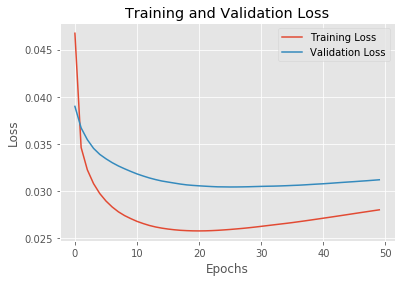

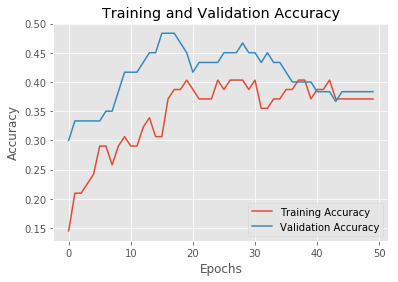

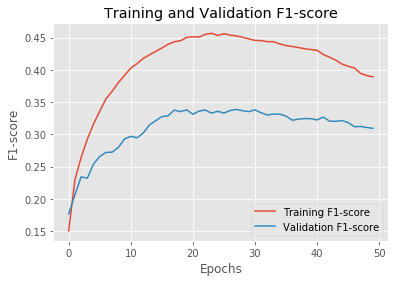

In [68]:
######################################################################
##      Plot train and validation loss, accuracy and f1 graphs      ##
######################################################################
metrics = ['Loss', 'Accuracy', 'F1-score']
train_metrics = [train_losses, train_accs, train_f1]
val_metrics = [val_losses, val_accs, val_f1]
def plot():
    for i in range(len(metrics)):
        plt.plot(train_metrics[i], label=f'Training {metrics[i]}')
        plt.plot(val_metrics[i], label=f'Validation {metrics[i]}')
        plt.title(f'Training and Validation {metrics[i]}')
        plt.xlabel('Epochs')
        plt.ylabel(metrics[i])    
        
        plt.legend(loc='best')
        plt.show()
plot()

100%|██████████| 16/16 [00:00<00:00, 130.22it/s]


Loss:2.88e-02 | Acc: 0.38| F1: 0.36|


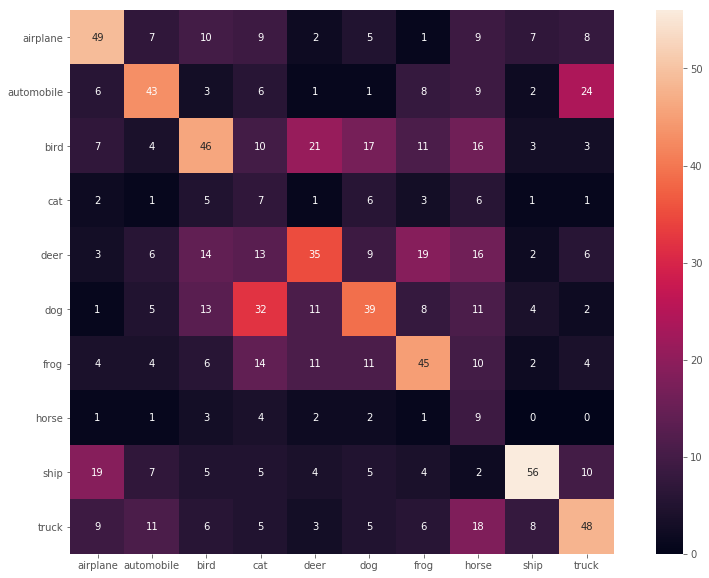

In [69]:
############################################################
##                  Test your best model                  ##
##          Report loss, accuracy and f1 metrics          ##
##      Also plot the confusion matrix for test data      ##
############################################################
    # Validation Phase
CLASSES = {0:'airplane',1: 'automobile', 2:'bird', 3:'cat', 4:'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'}

total_loss = 0
N = 0
confusion = np.zeros((10, 10))
acc = 0
with tqdm.tqdm(enumerate(test_sampler), total=len(test_sampler)) as pbar:
    for i, (x, y) in pbar:
        #################################
        ##          Your Code          ##
        #################################
        y_pred = best_model._forward(x)
        y_argmax_pred = np.argmax(y_pred, axis=1)
        confusion = update_confusion_matrix(confusion, y_argmax_pred, y)
        loss = np.sum(criterion._forward(y_pred, y))
        total_loss += loss
        N += y.shape[0]

        acc += np.sum(y_argmax_pred==y)
    acc /= N 
    f1 = f1_score(confusion)
    print(f'Loss:{total_loss/N:.2e} | Acc: {acc:.2f}| F1: {f1:.2f}|')
    plt.figure(figsize=(15, 10))
    clss = [j for i, j in sorted(CLASSES.items())]
    ax = sn.heatmap(confusion, annot=True, xticklabels=clss, yticklabels=clss, square=True)
    plt.show()

## Weights Visualization (5 Points)

For the last part we want to visualize weights matrix of the first layer.

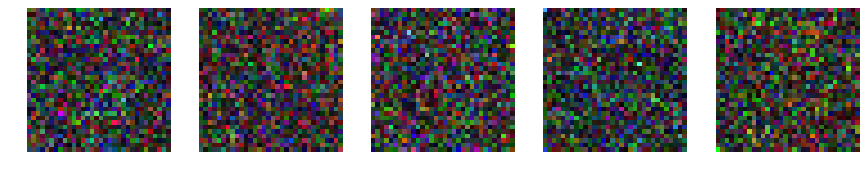

In [70]:
##########################################################
##          Visualize n of first layer weights          ##
##          First reshape them to (32, 32, 3)           ##
##########################################################
n = 5
plt.figure(figsize=(18, 6))
weights = model.layers[0].params['W']
length = weights.shape[1]
choices = np.random.choice(range(length), n)
index =0
for choice in choices:
    weight = np.abs(weights[:, choice]).reshape(1024, 3)
    image = weight / np.max(weight, axis=0)
    image = image.reshape(32, 32, 3)
    plt.subplot(2, 6, index + 1)
    plt.imshow(image)
    plt.axis('off')
    index += 1
